<font size="12" color="Blue"><center>**Sleep Analysis**</font>

<h1><b>Objective:</b></h1>

<h1><b><font color = 'green'>Importing Libraries</b>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h1><b><font color='orange'> Data Reading</h1>


In [16]:
df = pd.read_csv(f'/content/Health_Sleep_Statistics.csv')
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [ ]:
df.size

1200

In [ ]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Sleep Quality', 'Bedtime', 'Wake-up Time',
       'Daily Steps', 'Calories Burned', 'Physical Activity Level',
       'Dietary Habits', 'Sleep Disorders', 'Medication Usage'],
      dtype='object')

In [ ]:
df.columns.size

12

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [6]:
df.describe()
#Used to display only numeric columns which is evident in the table below

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


<h1><b><font color= 'red'>Data Cleaning</b></h1>

In [8]:
df.isna().sum()
#This is to check if there are any null values in the data

,0
User ID,0
Age,0
Gender,0
Sleep Quality,0
Bedtime,0
Wake-up Time,0
Daily Steps,0
Calories Burned,0
Physical Activity Level,0
Dietary Habits,0


In [9]:
df.duplicated().sum()
#This is to check if there are any duplicate values in the data

0

In [17]:
df.drop(['User ID'], axis = 1, inplace = True)
df.head()


,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


<h1><b><font color = 'Brown'>Visualization</b></h1>

<Axes: xlabel='Age', ylabel='Sleep Quality'>

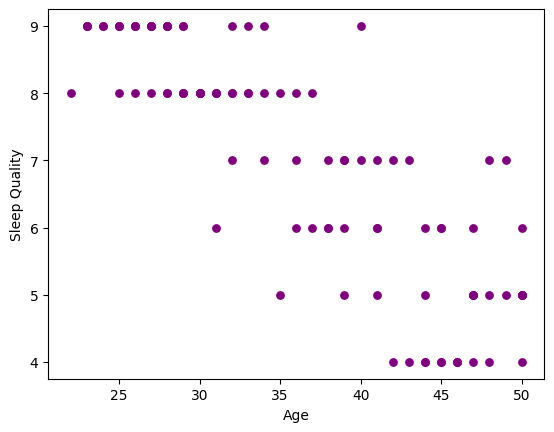

In [24]:
# @title Age vs Sleep Quality
#Here we can see that with increase in age there is a decrease in sleep quality
#From age 22-50 the sleep quality has reduced drastically

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Sleep Quality', s=28, alpha=1, c='purple')
#plt.gca().spines[['top', 'right',]].set_visible(False)
#to remove top and right borders from scatterplot

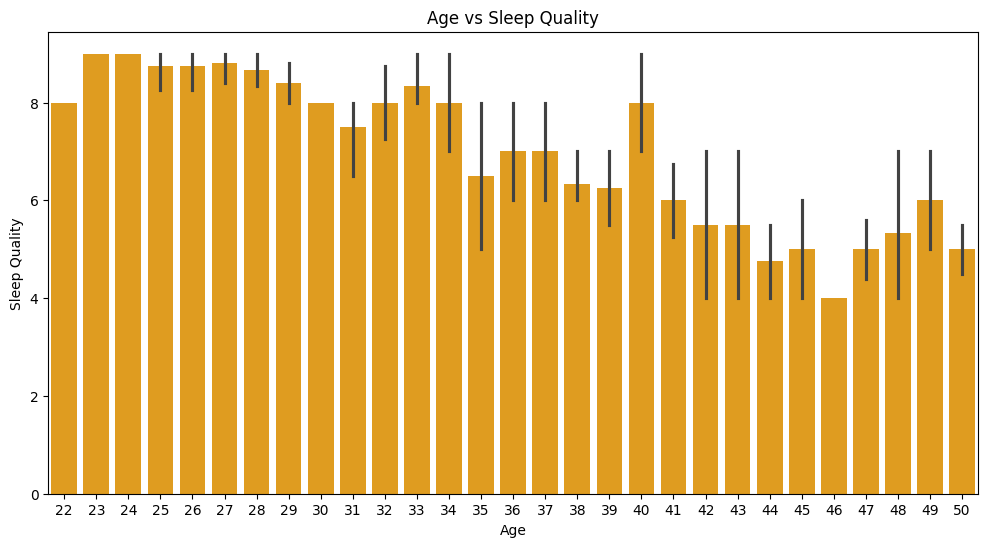

In [52]:
#Bar chart plotting
plt.figure(figsize = (12,6))
sns.barplot(x = 'Age', y = 'Sleep Quality', data = df, color= 'orange')
plt.title("Age vs Sleep Quality")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()



In [32]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model = LinearRegression()
X = df[['Age']]
Y = df['Sleep Quality']

model = LinearRegression()

model.fit(X, Y)

LinearRegression()

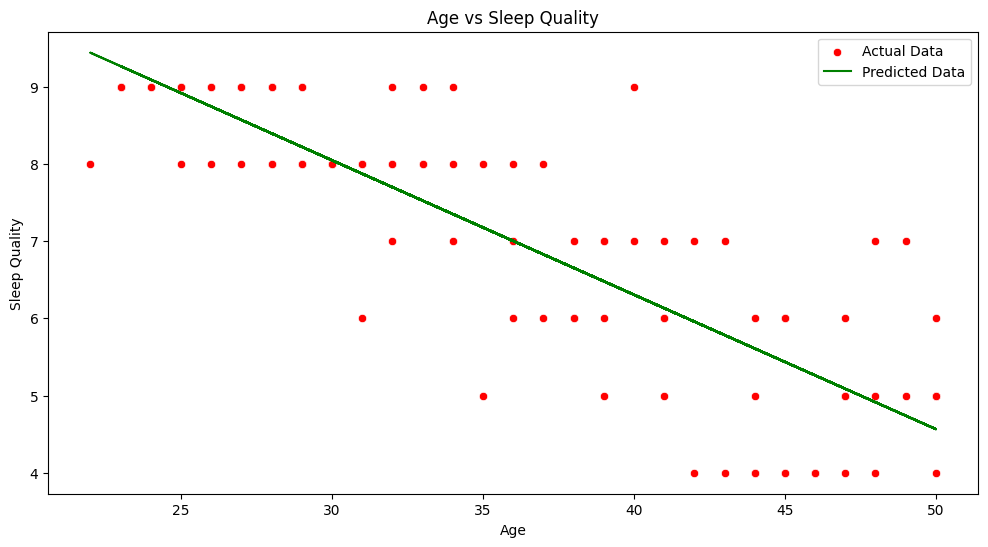

In [37]:
#Comparison between predicted and actual data
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Age', y = 'Sleep Quality', data = df, label = 'Actual Data', color = 'red')

plt.plot(X, model.predict(X), color = 'green', label = 'Predicted Data')

plt.title("Age vs Sleep Quality")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.legend()
plt.show()

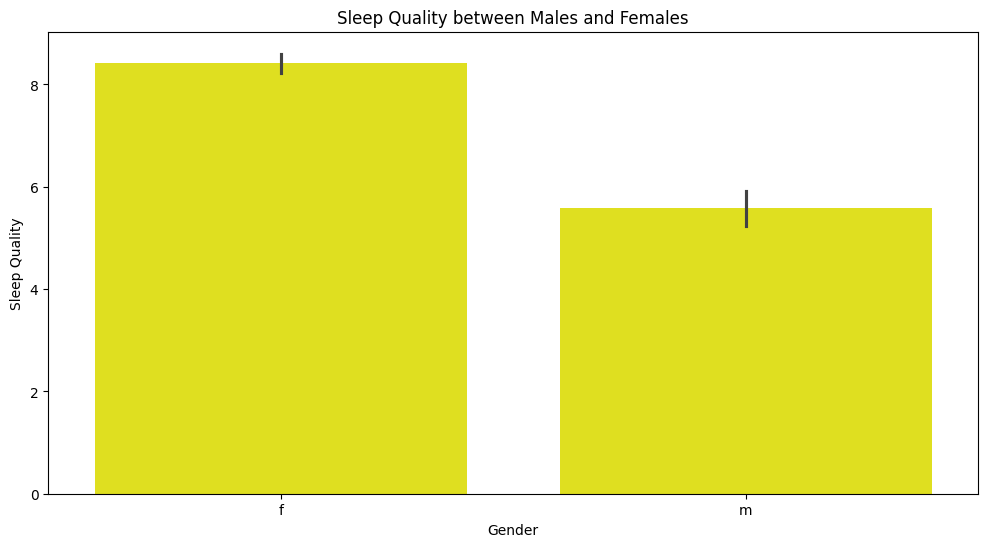

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Sleep Quality', data=df, color = 'yellow')
plt.title('Sleep Quality between Males and Females')
plt.xlabel('Gender')
plt.ylabel('Sleep Quality')
plt.show()

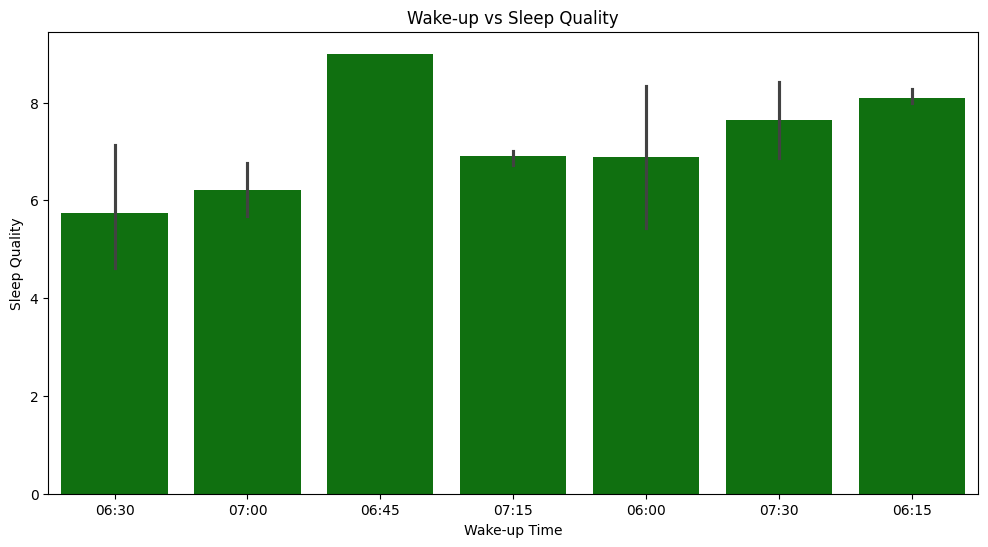

In [49]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Wake-up Time', y = 'Sleep Quality', data = df, color = 'green')
plt.xlabel("Wake-up Time")
plt.ylabel("Sleep Quality")
plt.title("Wake-up vs Sleep Quality")
plt.show()

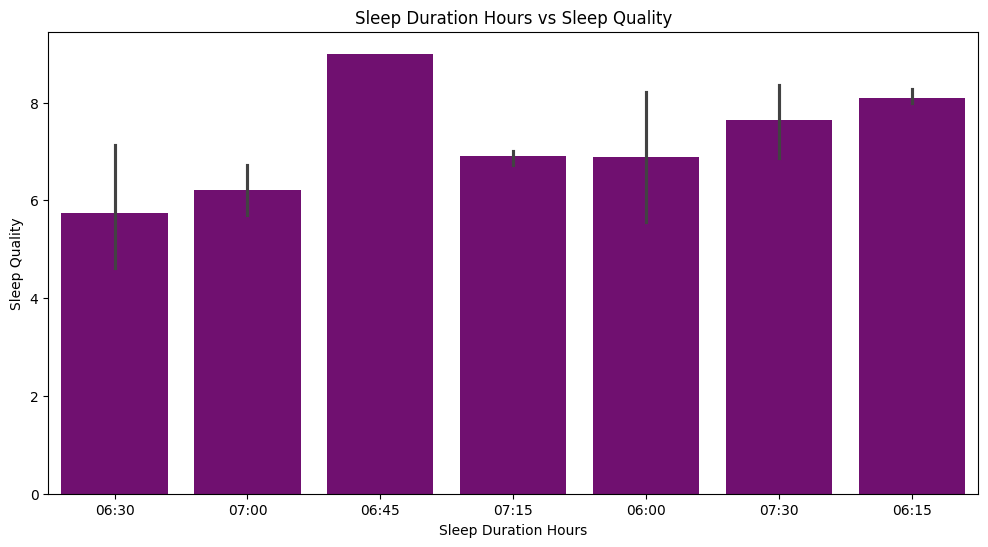

In [53]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Wake-up Time', y = 'Sleep Quality', data = df, color='purple')
plt.xlabel("Sleep Duration Hours")
plt.ylabel("Sleep Quality")
plt.title("Sleep Duration Hours vs Sleep Quality")
plt.show()

Text(0, 0.5, 'Sleep Quality')

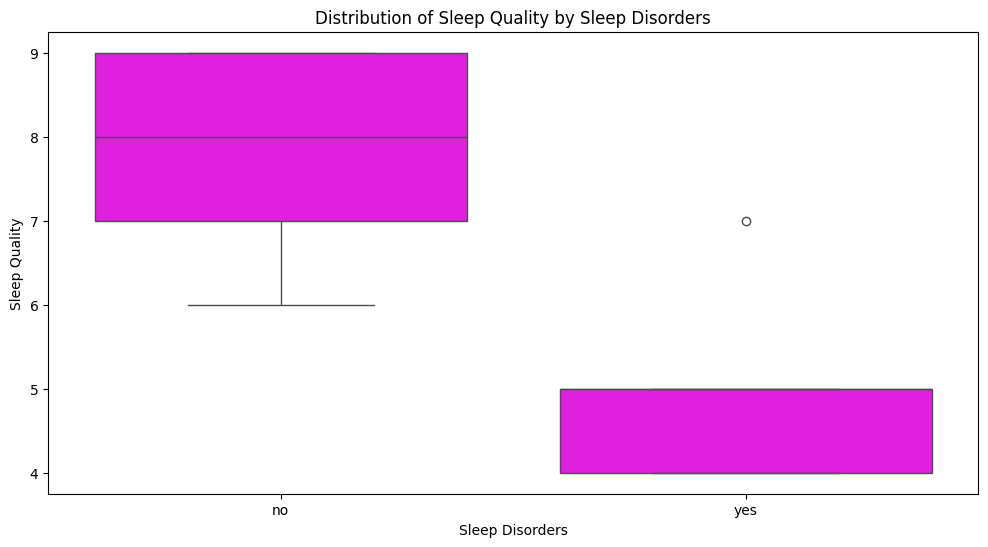

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sleep Disorders', y='Sleep Quality', data=df, color='magenta')
plt.title('Distribution of Sleep Quality by Sleep Disorders')
plt.xlabel('Sleep Disorders')
plt.ylabel('Sleep Quality')

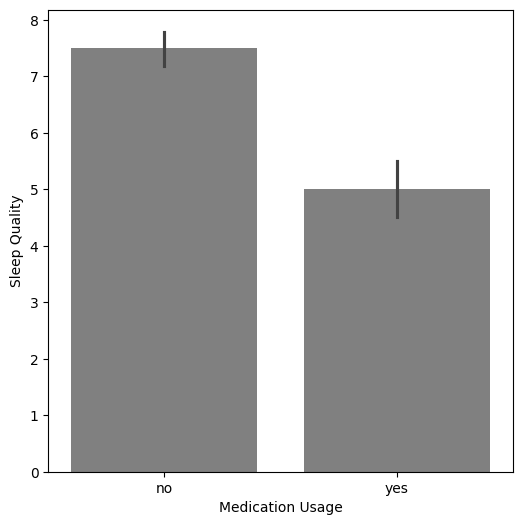

In [66]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'Medication Usage', y = 'Sleep Quality', data = df, color='grey')
plt.show()

In [68]:
df_numerics = df.select_dtypes(include = ['number'])
corr = df_numerics.corr()

print(corr['Sleep Quality'].sort_values(ascending=False))

Sleep Quality      1.000000
Daily Steps        0.976277
Calories Burned    0.973557
Age               -0.848356
Name: Sleep Quality, dtype: float64


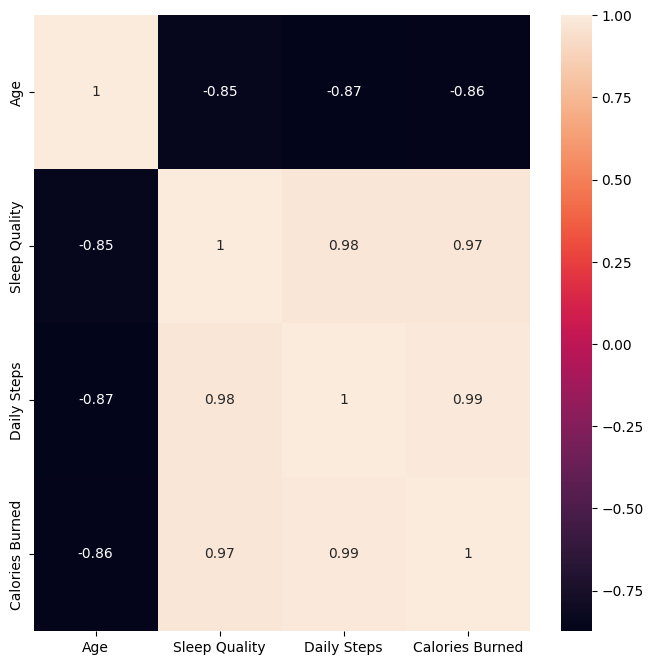

In [69]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True)
plt.show()